In [1]:
import os
import pandas as pd
import shutil
import time
import datetime
import json
import tqdm
import copy
import requests

In [2]:
characters = pd.read_csv('benriely.csv')

In [5]:
count = 0
for index, row in characters.iterrows():
    talents = row['Talents']
    #print(talents)
    #if 'Martial Arts' in talents:
        #print(row['Name'], talents)
        
    if 'All Martial Arts' in talents:
        print(row['Name'], talents)        

Albert ['Guns, Thrown Weapons, Sharp Weapons, Oriental Weapons, All Martial Arts, Tumbling, Military, Detective/Espionage, Ninja skills, Multi-Lingual: (English, Japanese, Russian, French), Stealth']
Anti-Cap ['All Martial Arts, Military']
Batroc the Leaper ['All Martial Arts, Acrobatics, Bilingual (English, French), Weapons Expert']
Black Light ['All Martial Arts, Shi’ar Technology, Starships, Astro-Navigation']
Cable ['Handguns, Marksman, Semi-Automatic, Weapons, All Martial Arts, Military, Detective/Espionage, Leadership']
Cable ['Handguns, Marksman, Semi-Automatic, Weapons, All Martial Arts, Military, Detective/Espionage, Leadership']
Cache ['Computers, All Martial Arts, All Scientific Skills']
Captain America ['Weapons Specialist: Shield, All Martial Arts, Artist, Leadership, Military']
Captain America ['Military, Marksmanship, Guns, Weapon Specialist: (Shield), Leadership, All Martial Arts, Acrobatics, Tumbling, Weapons Master, Thrown Weapons, Thrown Objects, Sharp Weapons, Motor

In [8]:
dfMA = characters.loc[characters['Talents'].str.contains('All Martial')]
dfMA

,Unnamed: 0,Name,Identity,Form,Alignment,Type,Size,F,A,S,...,Vehicle,Talents,Contacts,Weaknesses,Powers_Form,Spd,Att,Dam,Climbing,Escaping
39,39,Albert,NaN,NaN,NaN,NaN,NaN,In,Rm,Rm,...,{},"['Guns, Thrown Weapons, Sharp Weapons, Orienta...",['Elsie-Dee'],[''],{},0,0,0,0,0
103,103,Anti-Cap,NaN,NaN,NaN,NaN,NaN,In,In,In,...,{},"['All Martial Arts, Military']",['O.N.I.'],[''],{},0,0,0,0,0
189,189,Batroc the Leaper,Georges Batroc,NaN,NaN,NaN,NaN,In,In,Ex,...,{},"['All Martial Arts, Acrobatics, Bilingual (Eng...",['Hydra'],[''],{},0,0,0,0,0
243,243,Black Light,NaN,NaN,NaN,NaN,NaN,Ex,Rm,Ex,...,{},"['All Martial Arts, Shi’ar Technology, Starshi...",['Shi’ar Imperial Guard'],[''],{},0,0,0,0,0
336,336,Cable,Nathan Christopher Charles Dayspring Summers,NaN,NaN,NaN,NaN,In,Ex,Ex,...,{},"['Handguns, Marksman, Semi-Automatic, Weapons,...","['X-Force, X-Men, Deadpool, Wolverine']",[''],{},0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,2579,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,In,Rm,Gd,...,{},"['Guns, Thrown Weapons, Edged Weapons, Orienta...","['X-Men, The Avengers, Alpha Flight']",[''],{},0,0,0,0,0
2581,2581,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,In,Rm,Ex,...,{},"['Survival, Tracking, All Martial Arts']",['X-Men'],[''],{},0,0,0,0,0
2582,2582,Wolverine,Logan (James Howlett),NaN,NaN,NaN,NaN,In,Rm,Gd,...,{},"['Guns, Thrown Weapons, Edged Weapons, Orienta...","['X-Men, Cyclops']",[''],{},0,0,0,0,0
2606,2606,Xenith,NaN,NaN,NaN,NaN,NaN,Mn,Am,Un,...,{},"['All Martial Arts, Shi’ar Technology, Starshi...",['Shi’ar Imperial Guard'],['Any loss of self-faith drops all powers –2cs...,{},0,0,0,0,0


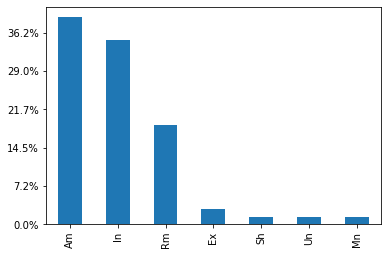

In [15]:
import matplotlib.ticker as mtick

ax = dfMA['F'].value_counts().plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(dfMA.shape[0]))


In [17]:
dfMA.loc[dfMA['F'].isin(['Sh','Un','Mn'])]

,Unnamed: 0,Name,Identity,Form,Alignment,Type,Size,F,A,S,...,Vehicle,Talents,Contacts,Weaknesses,Powers_Form,Spd,Att,Dam,Climbing,Escaping
1691,1691,Ogun,NaN,NaN,NaN,NaN,NaN,Sh,Rm,Sh,...,{},"['All Martial Arts, Oriental Weapons, Ninja, S...",['None'],[''],{},0,0,0,0,0
1787,1787,Power Princess,Zarda Shelton,NaN,NaN,NaN,NaN,Un,In,Un,...,{},"['All Martial Arts, Wrestling, Pilot, Weapons ...","['Squadron Supreme of America, Hyperion']",[''],{},0,0,0,0,0
2606,2606,Xenith,NaN,NaN,NaN,NaN,NaN,Mn,Am,Un,...,{},"['All Martial Arts, Shi’ar Technology, Starshi...",['Shi’ar Imperial Guard'],['Any loss of self-faith drops all powers –2cs...,{},0,0,0,0,0


In [18]:
dfMA.loc[dfMA['F'].isin(['Am'])]

,Unnamed: 0,Name,Identity,Form,Alignment,Type,Size,F,A,S,...,Vehicle,Talents,Contacts,Weaknesses,Powers_Form,Spd,Att,Dam,Climbing,Escaping
351,351,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,Am,Ex,Gd,...,{},"['Weapons Specialist: Shield, All Martial Arts...","['The New Avengers, Nick Fury, Falcon, Sharon ...","[""Paralysis: During this time, Captain America...",{},0,0,0,0,0
355,355,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,Am,In,Rm,...,{},"['Military, Marksmanship, Guns, Weapon Special...","['The Avengers, Nick Fury, Falcon, Sharon Cart...",[''],{},0,0,0,0,0
358,358,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,Am,In,Rm,...,{},"['Military, Marksmanship, Guns, Weapon Special...","['The Avengers, Nick Fury, Falcon, Sharon Cart...",['Hydra Agent: After being restored to his Sup...,{},0,0,0,0,0
362,362,Captain Britain,"Elizabeth ""Betsy"" Braddock",NaN,NaN,NaN,NaN,Am,In,Mn,...,{},"['All Martial Arts, Acrobatics, Tumbling, Orie...","['X-Men, Brian Braddock']",[''],{},0,0,0,0,0
389,389,The Cat,Shen Kuei,NaN,NaN,NaN,NaN,Am,Rm,Ex,...,{},"['All Martial Arts, Oriental Weapons, Detectiv...",[],[''],{},0,0,0,0,0
517,517,Daredevil II,Daniel Rand,NaN,NaN,NaN,NaN,Am,Rm,Gd,...,{},"['Business/Fiance, Accounting, All Martial Art...","['Luke Cage, Misty Knight']",[''],{},0,0,0,0,0
795,795,Gamora,Xen Whoberis,NaN,NaN,NaN,NaN,Am,Am,Am,...,{},"['All Martial Arts, Weapon Specialist: Dagger,...",['Infinity Watch'],['Gamora incurs normal Karma loss from killing...,{},0,0,0,0,0
1015,1015,Captain America,Steve Rogers,NaN,NaN,NaN,NaN,Am,In,Rm,...,{},"['Military, Marksmanship, Guns, Weapon Special...","['Hydra, The Avengers (Hydra)']",[''],{},0,0,0,0,0
1075,1075,Iron Fist,Daniel Rand,NaN,NaN,NaN,NaN,Am,Rm,Gd,...,{},"[""Thrown Weapons, Oriental Weapons, Marksmansh...","['Avengers, Luke Cage, Jessica Jones, Defenders']",[''],{},0,0,0,0,0
1139,1139,Captain America,Isaiah Bradley,NaN,NaN,NaN,NaN,Am,In,Rm,...,{},"['Weapons Specialist: (Shield), All Martial Ar...",['None'],[''],{},0,0,0,0,0


In [19]:
dfMA.to_csv('Martial-Arts-All.csv')

In [24]:
dfMHMHA = dfMA.loc[~dfMA['S'].isin(['Rm','In','Am','Mn','Un'])]


In [25]:
dfMHMHA.to_csv('Mostly-Human-Martial-Arts-All.csv')